# <font color = 'green'>DV2: Data Visualization</font> 

## <font color = 'blue'>Step 1: Load the Data</font>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('auto-mpg.csv')

In [3]:
#dropping/ignoring car_name 
data = data.drop('car name', axis=1)
# Also replacing the categorical var with actual values
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america


In [4]:
data.shape

(398, 8)

## <font color = 'blue'>Step 2: Data Preparation</font>

In [5]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [6]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


In [7]:
# Missing values have a'?''
# Replace missing values with NaN
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [8]:
#instead of dropping the rows, lets replace the missing values with median value. 
data.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [9]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
data[['horsepower']] = data[['horsepower']].apply(medianFiller)

data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object / string type to float
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


## <font color = 'blue'>Step 3: Data Visualization</font>

In [10]:
# sns.pairplot(data, diag_kind = 'kde')
data = data.drop('origin', axis=1)

#### Reference:
    1. [Geron p.59]

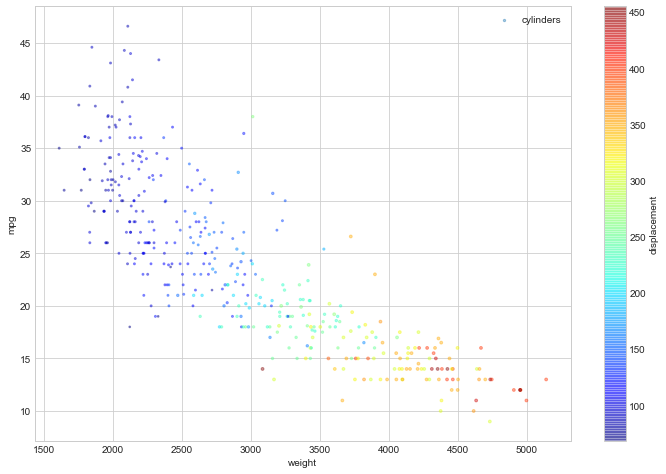

In [11]:
data.plot(kind="scatter", x="weight", y="mpg", alpha=0.4,
    s=data["cylinders"], label="cylinders", figsize=(12,8),
    c='displacement', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [12]:
type(data[['cylinders']])

pandas.core.frame.DataFrame

### 3D Reference:
 1. Johansson p.177

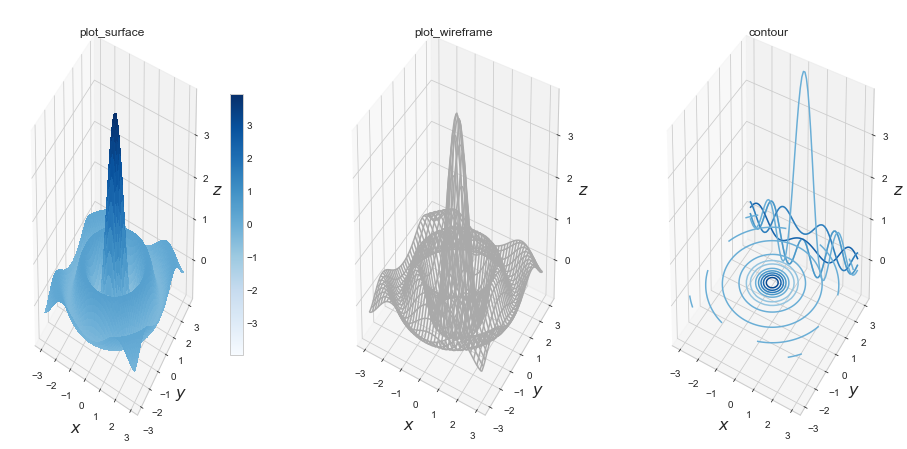

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig, axes = plt.subplots(1, 3, figsize=(16, 8), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.Blues)

cb = fig.colorbar(p, ax=axes[0], shrink=0.6) 

title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")

title_and_labels(axes[1], "plot_wireframe")

cset = axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues)

title_and_labels(axes[2], "contour")

Text(0.5, 0, 'Z Label')

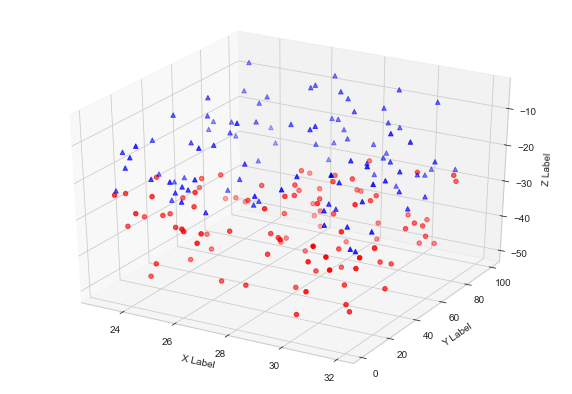

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [15]:
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})

def y_true(x1, x2):
    return 1 + 2 * x1 + 3 * x2 + 4 * x1 * x2

data["y_true"] = y_true(x1, x2)
e = 4* np.random.randn(N)
data["y"] = data["y_true"] + e
data.head(3).round(3)

,x1,x2,y_true,y
0,-0.849,0.402,-0.859,9.678
1,-1.582,-0.555,-0.316,1.548
2,0.796,-1.861,-8.917,-1.066


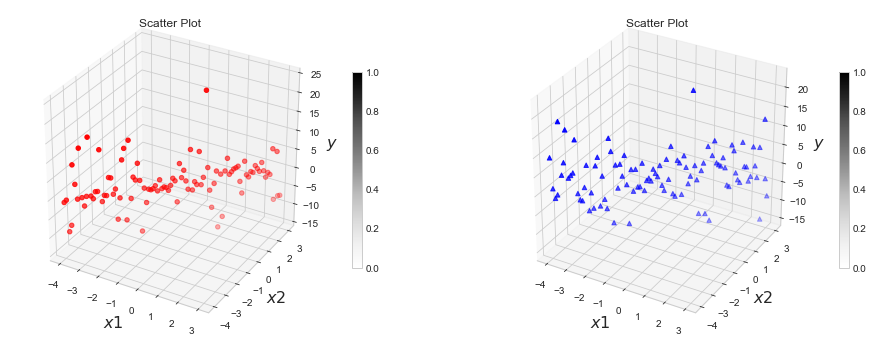

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x1$", fontsize=16)
    ax.set_ylabel("$x2$", fontsize=16)
    ax.set_zlabel("$y$", fontsize=16)

x = y = np.linspace(-4, 3, 100)
X, Y = np.meshgrid(x, y)

# Z = 1 + 2 * x1 + 3 * x2 + 4 * x1 * x2
Z1 = data['y_true']
Z2 = data['y']

norm = mpl.colors.Normalize(-abs(Z1).max(), abs(Z1).max())

p = ax[0].scatter(x, y, Z1, c='r', marker='o')

cb = fig.colorbar(p, ax=ax[0], shrink=0.6) 

title_and_labels(ax[0], "Scatter Plot")

p = ax[1].scatter(x, y, Z2, c='b', marker='^')

cb = fig.colorbar(p, ax=ax[1], shrink=0.6) 

title_and_labels(ax[1], "Scatter Plot")